In [1]:
%load_ext nb_black

import openproblems as op
import scanpy_processing as scp

<IPython.core.display.Javascript object>

In [2]:
adata = op.data.citeseq.load_citeseq_cbmc()
# can also use:
# adata = op.tasks.dimensional_reduction.datasets.citeseq.load_citeseq_cbmc()
adata

AnnData object with n_obs × n_vars = 8617 × 36280
    uns: 'mode2_obs', 'mode2_var'
    obsm: 'mode2'

<IPython.core.display.Javascript object>

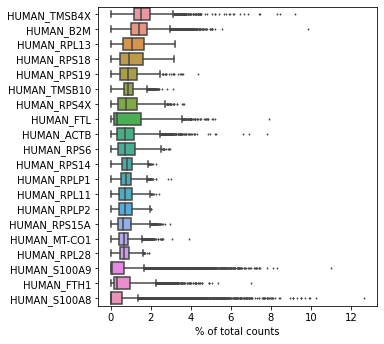

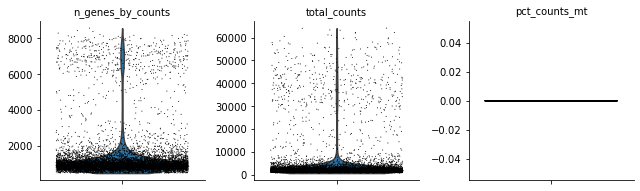

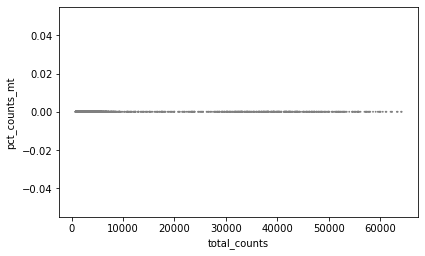

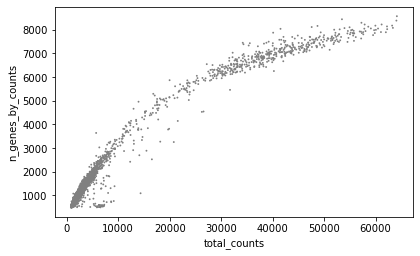

/home/mvinyard/anaconda3/envs/nodescape/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


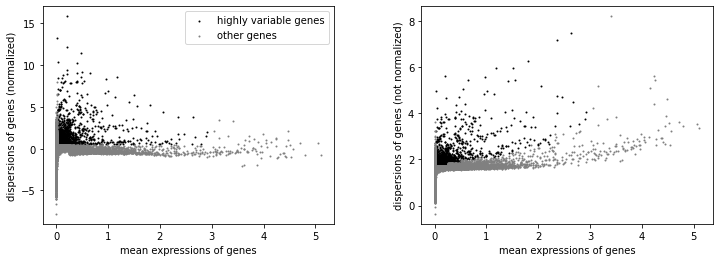

<IPython.core.display.Javascript object>

In [3]:
adata = scp.run_standard_scanpy_preprocessing(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


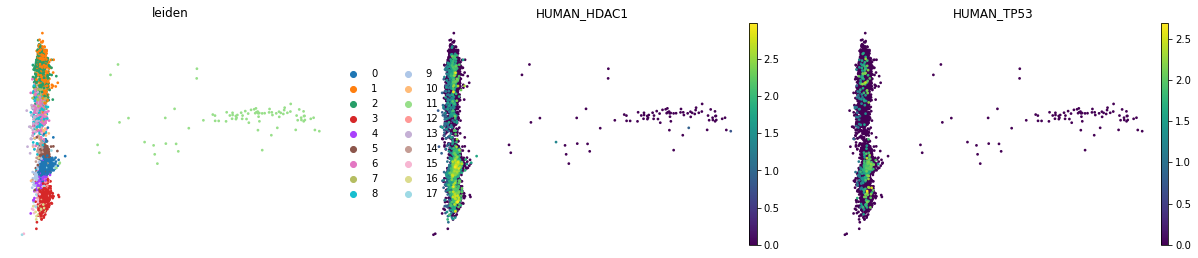

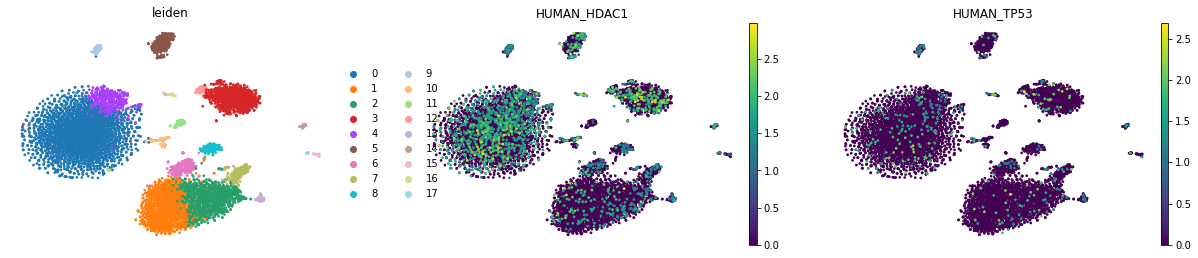

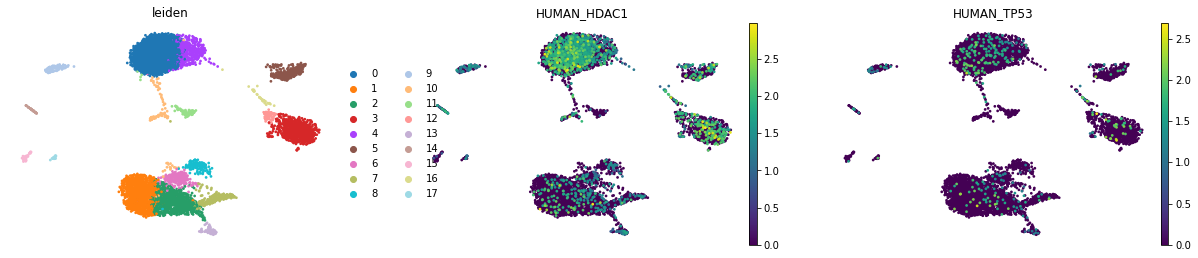

<IPython.core.display.Javascript object>

In [4]:
scp.scanpy_projection(adata)

In [5]:
adata.write("citeseq_scanpy_processed.h5ad")

<IPython.core.display.Javascript object>

In [1]:
import anndata as a
import openproblems as op

adata = a.read_h5ad("citeseq_scanpy_processed.h5ad")
adata

AnnData object with n_obs × n_vars = 7992 × 3311
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'leiden', 'leiden_colors', 'mode2_obs', 'mode2_var', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'mode2'
    obsp: 'connectivities', 'distances'

In [2]:
adata = op.tasks.dimensional_reduction.metrics.root_mean_square_error.compare_RMSE(adata, 'pca')
adata = op.tasks.dimensional_reduction.metrics.root_mean_square_error.compare_RMSE(adata, 'umap')
adata = op.tasks.dimensional_reduction.metrics.root_mean_square_error.compare_RMSE(adata, 'tsne')
adata.write("citeseq_processed_rmse_calculated.h5ad")

In [1]:
import anndata as a
import openproblems as op

adata = a.read_h5ad("citeseq_processed_rmse_calculated.h5ad")
adata

AnnData object with n_obs × n_vars = 7992 × 3311
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: ' rmse_calculation_pca10d', ' rmse_calculation_pca1d', ' rmse_calculation_pca25d', ' rmse_calculation_pca2d', ' rmse_calculation_pca30d', ' rmse_calculation_pca50d', ' rmse_calculation_pca5d', 'RMSE_tsne', 'RMSE_umap', 'kruskal_score_pca10d', 'kruskal_score_pca1d', 'kruskal_score_pca25d', 'kruskal_score_pca2d', 'kruskal_score_pca30d', 'kruskal_score_pca50d', 'kruskal_score_pca5d', 'kruskel_score_tsne', 'kruskel_score_umap', 'leiden', 'leiden_colors', 'mode2_obs', 'mode2_var', 'neighbors', 'rmse_all', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'mode2'
    obsp: 'connectivities', 'distances', 'kruskal_matrix_pca10d', 'kruskal_matrix_pca1d', 'kruskal_m

In [2]:
adata.uns['rmse_all'] = [ adata.uns[' rmse_calculation_pca50d'], 
adata.uns[' rmse_calculation_pca30d'], 
adata.uns[' rmse_calculation_pca25d'], 
adata.uns[' rmse_calculation_pca10d'], 
adata.uns[' rmse_calculation_pca5d'], 
adata.uns[' rmse_calculation_pca2d'], 
adata.uns[' rmse_calculation_pca1d'], 
adata.uns['RMSE_umap' ], 
adata.uns['RMSE_tsne'], ]

# adata.write("citeseq_processed_rmse_calculated.h5ad")

In [3]:
rmse_pca = adata.uns['rmse_all'][0:7]
dimensions = [50, 30, 25, 10, 5, 2, 1]
methods_axis = ['50 PCs', '30 PCs', '25 PCs', '10 PCs', '5 PCs', '2 PCs', '1 PC','UMAP', 'tSNE']

In [4]:
import pandas as pd
op.tasks.dimensional_reduction.metrics.kruskel_plot(pd.DataFrame(adata.obsm["X_pca"][:, 0:2]), pd.DataFrame(adata.obsp['kruskal_matrix_pca2d']), "PCA")

In [5]:
op.tasks.dimensional_reduction.metrics.plot_rmse(dimensions, rmse_pca)

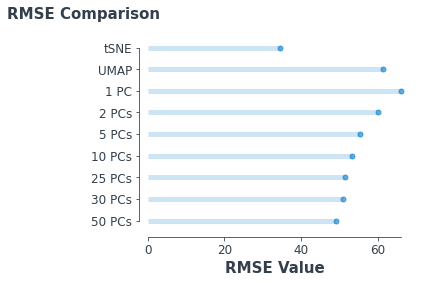

In [7]:
import warnings 
warnings.filterwarnings("ignore")

op.tasks.dimensional_reduction.metrics.plot_rmse_comparison(adata.uns['rmse_all'], methods_axis)